In [6]:
from keras.datasets import mnist
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, BatchNormalization, Conv2D, MaxPooling2D
from sklearn.preprocessing import OneHotEncoder



In [7]:
# Load data and flatten images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X = np.concatenate((X_train, X_test)).astype('float32').reshape((70000, 28, 28, 1))
y = np.concatenate((y_train, y_test))

enc = OneHotEncoder().fit(y_train.reshape(-1, 1))

y = enc.transform(y.reshape(-1, 1)).toarray()
X = (X - 127.5) / 127.5

print(X.shape, y.shape)

(70000, 28, 28, 1) (70000, 10)


In [4]:
# Declares fews variables

img_shape = (28, 28, 1)
n_classes = 10
n_filters = 16
n_epochs = 20 # How many time the CNet will be feed
kernel_size = (4, 4) # Shape of the filter, le filtre correspond une petite matrice utilisé pour appliqué un produit matriciel et simplifier les données
pool_size = (2, 2) # Shape of the feature after the pooling
batch_size = 64 # NB. samples in a batch. Batch mean a subset of X since we not gonna feed the CNet once

In [17]:
inputs = Input(shape=img_shape)

cov = Conv2D(n_filters,kernel_size=(kernel_size[0],kernel_size[1]),padding='same', use_bias=False)(inputs)
cov = BatchNormalization()(cov)
cov = Activation('relu')(cov)
cov = Conv2D(n_filters,kernel_size=(kernel_size[0],kernel_size[1]),padding='same', use_bias=False)(cov)
cov = BatchNormalization()(cov)
cov = Activation('relu')(cov)
cov = MaxPooling2D(pool_size=pool_size)(cov)
cov = Dropout(0.3)(cov)

cov = Conv2D((n_filters * 2),kernel_size=(kernel_size[0],kernel_size[1]), use_bias=False)(cov)
cov = BatchNormalization()(cov)
cov = Activation('relu')(cov)
cov = Conv2D((n_filters * 2),kernel_size=(kernel_size[0],kernel_size[1]),padding='same', use_bias=False)(cov)
cov = BatchNormalization()(cov)
cov = Activation('relu')(cov)
cov = MaxPooling2D(pool_size=pool_size)(cov)
cov = Dropout(0.3)(cov)


cov = Conv2D((n_filters * 4),kernel_size=(kernel_size[0],kernel_size[1]), use_bias=False)(cov)
cov = BatchNormalization()(cov)
cov = Activation('relu')(cov)
cov = Conv2D((n_filters * 4),kernel_size=(kernel_size[0],kernel_size[1]),padding='same', use_bias=False)(cov)
cov = BatchNormalization()(cov)
cov = Activation('relu')(cov)
cov = MaxPooling2D(pool_size=pool_size)(cov)
cov = Dropout(0.3)(cov)

cov = Conv2D((n_filters * 8),kernel_size=(kernel_size[0],kernel_size[1]), use_bias=False, padding="same")(cov)
cov = BatchNormalization()(cov)
cov = Activation('relu')(cov)
cov = Conv2D((n_filters * 8),kernel_size=(kernel_size[0],kernel_size[1]),padding='same', use_bias=False)(cov)
cov = BatchNormalization()(cov)
cov = Activation('relu')(cov)
cov = MaxPooling2D(pool_size=pool_size, padding="same")(cov)
cov = Dropout(0.3)(cov)

cov_out = Flatten()(cov)


# Dense Layers
cov2 = Dense(2056, activation='relu')(cov_out)
cov2 = Dropout(0.3)(cov2)



# Prediction layers
c0 = Dense(n_classes, activation='softmax')(cov2)

# Defining the model
model = Model(inputs=inputs,outputs=c0)
print (model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 16)        256       
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
activation_16 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 16)        4096      
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
activation_17 (Activation)   (None, 28, 28, 16)        0   

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model
model.fit(X, y, batch_size=batch_size, epochs=n_epochs,verbose=1)

Epoch 1/20
1094/1094 [==============================] - 85s 77ms/step - loss: 0.2682 - accuracy: 0.9172
Epoch 2/20
1094/1094 [==============================] - 81s 74ms/step - loss: 0.1005 - accuracy: 0.9730
Epoch 3/20
1094/1094 [==============================] - 84s 77ms/step - loss: 0.0805 - accuracy: 0.9791
Epoch 4/20
1094/1094 [==============================] - 88s 81ms/step - loss: 0.0709 - accuracy: 0.9823
Epoch 5/20
1094/1094 [==============================] - 95s 87ms/step - loss: 0.0655 - accuracy: 0.9833
Epoch 6/20
1094/1094 [==============================] - 94s 86ms/step - loss: 0.0569 - accuracy: 0.9853
Epoch 7/20
1094/1094 [==============================] - 94s 86ms/step - loss: 0.0548 - accuracy: 0.9860
Epoch 8/20
1094/1094 [==============================] - 93s 85ms/step - loss: 0.0500 - accuracy: 0.9868
Epoch 9/20
1094/1094 [==============================] - 93s 85ms/step - loss: 0.0470 - accuracy: 0.9881
Epoch 10/20
1094/1094 [==============================] - 93s 85m

In [19]:
model.save("data/single/model")

INFO:tensorflow:Assets written to: data/single/model\assets


In [24]:
np.unique(X_train[0], return_counts=True)

(array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
         27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
         70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
        127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
        170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
        207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
        247, 249, 250, 251, 252, 253, 255], dtype=uint8),
 array([618,   2,   3,   1,   1,   3,   1,   2,   5,   1,   1,   1,   1,
          1,   1,   1,   1,   2,   1,   1,   1,   1,   1,   1,   2,   1,
          1,   1,   2,   2,   2,   1,   2,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   2,   1,   1,   1,   3,   1,   1,   1,
          1,   1,   2,   1,   2,   1,   1,   1,   2,   2,   2,   1,   1,
          1,   1,   1,   2,   1,   2,   1,   1,   1,   1,   2,   1,   1,
          2,   2,   1,   1,   1,  54,   1], dtype=int64))

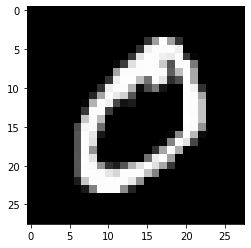

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X[1], cmap='gray')

In [ ]:
X[1]

In [40]:
model.predict(X[10].reshape(1,28, 28))

array([[3.4159373e-09, 6.1828337e-07, 3.6774311e-06, 9.9980360e-01,
        2.4954781e-11, 1.8770449e-04, 4.0591445e-08, 1.7561611e-06,
        1.8272335e-06, 8.0254296e-07]], dtype=float32)

In [5]:
np.unique(X[1], return_counts=True)

(array([-1.        , -0.9529412 , -0.94509804, -0.92156863, -0.90588236,
        -0.8509804 , -0.8352941 , -0.8039216 , -0.78039217, -0.77254903,
        -0.70980394, -0.7019608 , -0.6313726 , -0.62352943, -0.60784316,
        -0.6       , -0.5764706 , -0.56078434, -0.5529412 , -0.5294118 ,
        -0.5058824 , -0.44313726, -0.4117647 , -0.40392157, -0.38039216,
        -0.34117648, -0.33333334, -0.3254902 , -0.24705882, -0.12156863,
        -0.10588235, -0.05098039, -0.04313726,  0.00392157,  0.01960784,
         0.02745098,  0.05882353,  0.10588235,  0.13725491,  0.14509805,
         0.16078432,  0.24705882,  0.27058825,  0.2784314 ,  0.29411766,
         0.30980393,  0.31764707,  0.35686275,  0.39607844,  0.40392157,
         0.45882353,  0.48235294,  0.49019608,  0.5294118 ,  0.5372549 ,
         0.5529412 ,  0.56078434,  0.58431375,  0.6313726 ,  0.6862745 ,
         0.7490196 ,  0.75686276,  0.7647059 ,  0.78039217,  0.7882353 ,
         0.79607844,  0.8039216 ,  0.827451  ,  0.8